In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy

%matplotlib inline

## Visualize grouping by borough and violation type

In [68]:
crime_df = pd.read_csv('crime_by_boro_type.out', header=None)
crime_df.sort([0, 1], inplace=True)
crime_df

/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,0,1,2
17,BRONX,FELONY,294643
14,BRONX,MISDEMEANOR,677215
6,BRONX,VIOLATION,131656
5,BROOKLYN,FELONY,495909
11,BROOKLYN,MISDEMEANOR,844865
13,BROOKLYN,VIOLATION,185439
3,MANHATTAN,FELONY,385885
10,MANHATTAN,MISDEMEANOR,705614
2,MANHATTAN,VIOLATION,124750
7,QUEENS,FELONY,338472


In [69]:
crime_df.iloc[15:][0] = 'UNKNOWN'

/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
crime_table = crime_df.pivot_table(values=2, index=[0], columns=[1], aggfunc=np.sum)
Population = [1455444, 2636735, 1644518, 2339150, 474558, 1000000]
crime_table


1,FELONY,MISDEMEANOR,VIOLATION
0,,,
BRONX,294643,677215,131656
BROOKLYN,495909,844865,185439
MANHATTAN,385885,705614,124750
QUEENS,338472,544291,128239
STATEN ISLAND,52224,146443,45123
UNKNOWN,290,146,27


In [99]:
crime_table_pc = (crime_table.T / Population).T
crime_table_pc

1,FELONY,MISDEMEANOR,VIOLATION
0,,,
BRONX,0.202442,0.465298,0.090458
BROOKLYN,0.188077,0.320421,0.070329
MANHATTAN,0.234649,0.429070,0.075858
QUEENS,0.144699,0.232688,0.054823
STATEN ISLAND,0.110048,0.308588,0.095084
UNKNOWN,0.000290,0.000146,0.000027


In [71]:
#Calculate fraction by row (e.g. Bronx Felonies / Total Bronx Crimes)
#crime_table.FELONY_FRAC = crime_table.FELONY / crime_table.sum(axis=1)
#crime_table.MISDEMEANOR_FRAC = crime_table.MISDEMEANOR / crime_table.sum(axis=1)
#crime_table.VIOLATION_FRAC = crime_table.VIOLATION / crime_table.sum(axis=1)

In [72]:
#Calculate fraction by column (e.g. Bronx Felonies / Total Felonies)
crime_table.FELONY_FRAC = crime_table['FELONY'] / crime_table['FELONY'].sum()
crime_table.MISDEMEANOR_FRAC = crime_table['MISDEMEANOR'] / crime_table['MISDEMEANOR'].sum()
crime_table.VIOLATION_FRAC = crime_table['VIOLATION'] / crime_table['VIOLATION'].sum()

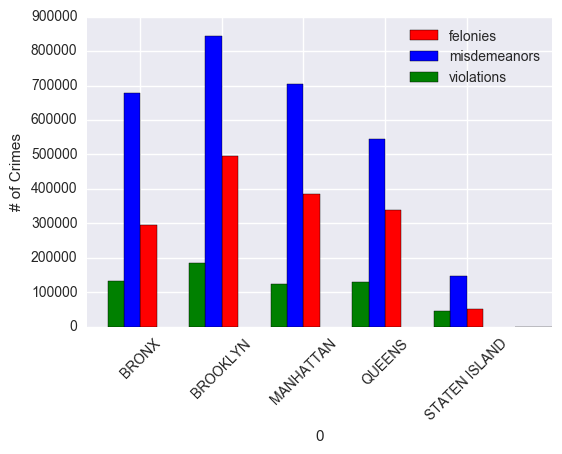

In [73]:
#Total no. of crimes
width = 0.2
crime_table['FELONY'].plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table['MISDEMEANOR'].plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table['VIOLATION'].plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS', 'STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('# of Crimes')
plt.legend()
plt.savefig('crimes_by_boro_type.png', format='png')

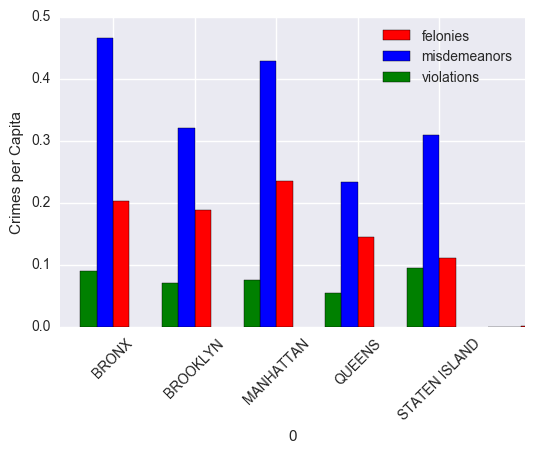

In [100]:
#Crimes per capita
width = 0.2
crime_table_pc['FELONY'].plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table_pc['MISDEMEANOR'].plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table_pc['VIOLATION'].plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS', 'STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('Crimes per Capita')
plt.legend()

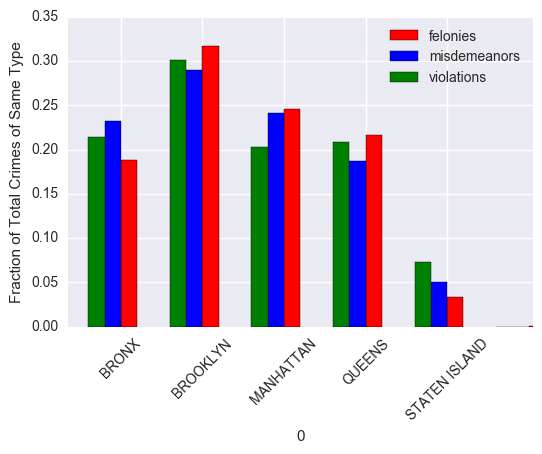

In [74]:
width = 0.2
crime_table.FELONY_FRAC.plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table.MISDEMEANOR_FRAC.plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table.VIOLATION_FRAC.plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('Fraction of Total Crimes of Same Type')
plt.legend()
plt.savefig('crimes_by_boro_type_proportions.png', format='png')

## Visualize grouping by latitude and longitude

In [75]:
crime_latlon_df = pd.read_csv('crime_latlon.out', header=None)
crime_latlon_df.head()

,0,1,2
0,(40.675955092,-73.735303537),5.0
1,(40.80421449,-73.964750975),188.0
2,(40.670460299,-73.882558823),65.0
3,(40.822016943,-73.93891535),266.0
4,(40.749870892,-73.898905454),63.0


In [76]:
crime_latlon_df[0] = pd.to_numeric(crime_latlon_df[0].str.strip(to_strip = '('))
crime_latlon_df[1] = crime_latlon_df[1].str.strip(to_strip = ')').str.strip()
crime_latlon_df[1] = pd.to_numeric(crime_latlon_df[1])
crime_latlon_df[2] = pd.to_numeric(crime_latlon_df[2])
crime_latlon_df.describe()

,0,1,2
count,112826.000000,112827.000000,112826.000000
mean,40.705331,-72.251098,43.545681
std,0.087794,560.349607,118.469187
min,40.498061,-74.255076,1.000000
25%,40.637517,-73.979518,5.000000
50%,40.702664,-73.910858,15.000000
75%,40.761056,-73.837030,43.000000
max,40.912723,188146.000000,17232.000000


In [77]:
crime_latlon_df[crime_latlon_df[1]==188146.000000]

,0,1,2
96106,NaN,188146.0,NaN


In [78]:
crime_latlon_df = crime_latlon_df.drop(crime_latlon_df[crime_latlon_df[1]==188146.000000].index[0])

In [79]:
lat = crime_latlon_df[1]
lon = crime_latlon_df[0]
crimes = crime_latlon_df[2]

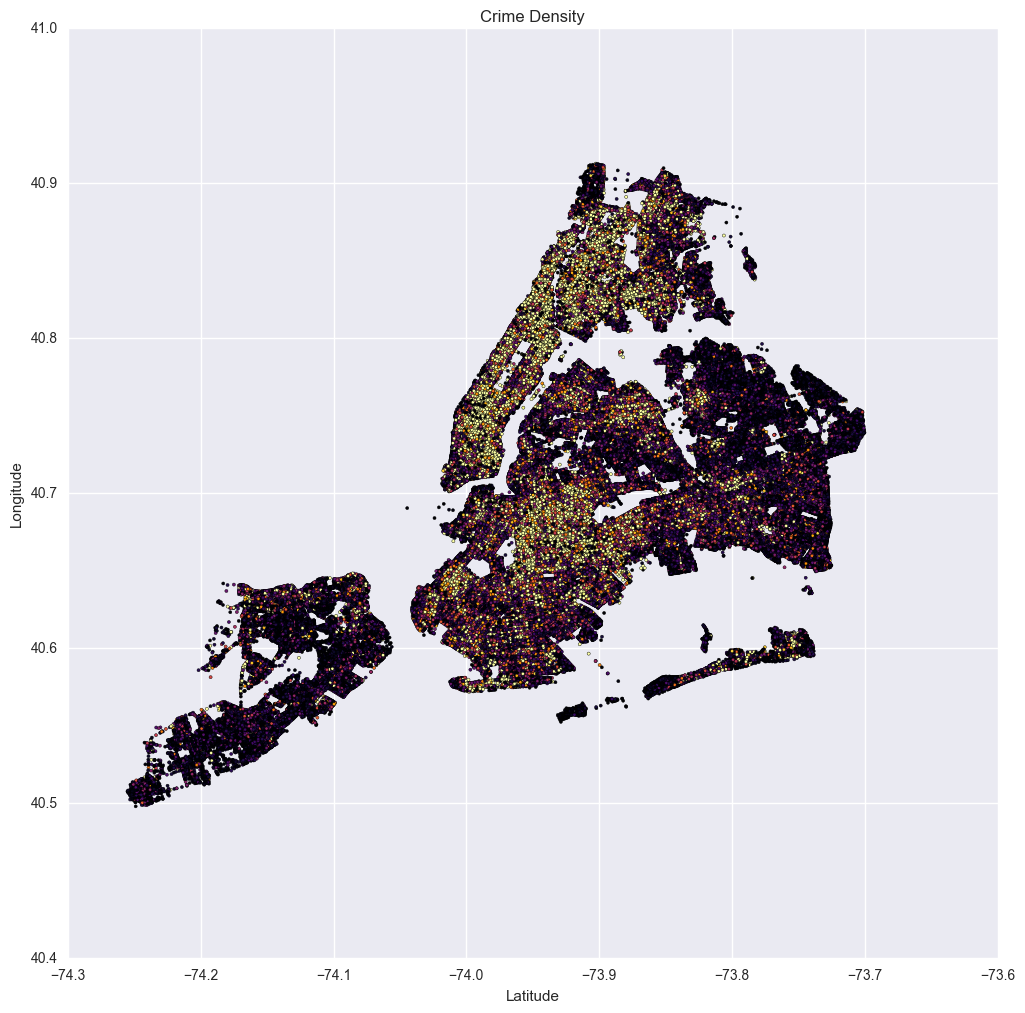

In [90]:
plt.figure(figsize=(12,12))
my_plot = plt.scatter(lat,lon, c=np.minimum(75,crimes), s=5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Crime Density')
plt.savefig('crimes_by_latlon.png', format='png')
plt.inferno()
plt.savefig('crimes_by_latlon_color.png', format='png')